# 조건1
1. 불필요한 컬럼 삭제
2. 이상치 처리 - 클립핑 / 중간값
3. 인코딩 - 원핫
4. train/test - 0.2
5. 데이터 불균형 - SMOTE
6. 스케일러 - Robust


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import shapiro
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('Telco_customer_churn_cleaned.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_rate,CLTV,Churn Reason,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Age,Under 30,Married,Referred a Friend,Number of Referrals,Offer,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Premium Tech Support,Unlimited Data,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,3239,Competitor made better offer,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,37,No,No,No,0,NaN,10.47,21,No,No,Yes,0.00,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,2701,Moved,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,19,Yes,No,No,0,NaN,9.12,51,No,No,Yes,0.00,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,5372,Moved,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,31,No,No,No,0,NaN,12.15,26,Yes,No,Yes,0.00,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,5003,Moved,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,23,Yes,Yes,No,0,Offer C,4.89,47,Yes,Yes,Yes,0.00,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,5340,Competitor had better devices,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,38,No,No,No,0,NaN,44.33,11,Yes,No,Yes,0.00,0,2172.17,7208.47,1,Churned,Competitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,5306,NaN,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,30,No,No,No,0,NaN,22.77,0,No,No,No,19.31,0,1639.44,3039.53,5,Stayed,0
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,2140,NaN,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,38,No,Yes,Yes,1,Offer C,36.05,24,Yes,Yes,Yes,48.23,0,865.20,2807.47,3,Stayed,0
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,5560,NaN,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,30,No,Yes,Yes,4,NaN,29.66,59,Yes,No,Yes,45.38,0,2135.52,9453.04,4,Stayed,0
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,2793,NaN,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,32,No,Yes,Yes,1,NaN,0.00,17,No,No,Yes,27.24,0,0.00,319.21,4,Stayed,0


# 1.불필요한 컬럼 삭제

In [ ]:
columns_to_drop = ['Satisfaction Score', 'Customer Status', 'Churn Category', 'Churn Reason',
                   'Country', 'State', 'City', 'Latitude', 'Longitude', 'Zip Code',
                   'Offer', 'Under 30', 'SeniorCitizen', 'Referred a Friend',
                   'Total Revenue', 'Total Long Distance Charges', 'Total Refunds',
                   'TotalCharges', 'Premium Tech Support', 'Partner',
                   'customerID', 'Churn', 'MonthlyCharges' , 'Count', 'Lat Long']


In [ ]:
# 컬럼 삭제
df = df.drop(columns=columns_to_drop)

In [ ]:
df

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,churn_rate,CLTV,Age,Married,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Unlimited Data,Total Extra Data Charges
0,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,3239,37,No,0,10.47,21,No,Yes,0
1,Female,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,2701,19,No,0,9.12,51,No,Yes,0
2,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,5372,31,No,0,12.15,26,Yes,Yes,0
3,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1,5003,23,Yes,0,4.89,47,Yes,Yes,0
4,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1,5340,38,No,0,44.33,11,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0,5306,30,No,0,22.77,0,No,No,0
7039,Male,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,2140,38,Yes,1,36.05,24,Yes,Yes,0
7040,Female,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,5560,30,Yes,4,29.66,59,Yes,Yes,0
7041,Female,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2793,32,Yes,1,0.00,17,No,Yes,0


In [ ]:
df.to_csv('Telco_drop.csv', index=False)

# 2.이상치 처리

In [ ]:
df = pd.read_csv('Telco_drop.csv')
df

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,churn_rate,CLTV,Age,Married,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Unlimited Data,Total Extra Data Charges
0,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,3239,37,No,0,10.47,21,No,Yes,0
1,Female,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,2701,19,No,0,9.12,51,No,Yes,0
2,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,5372,31,No,0,12.15,26,Yes,Yes,0
3,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1,5003,23,Yes,0,4.89,47,Yes,Yes,0
4,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1,5340,38,No,0,44.33,11,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0,5306,30,No,0,22.77,0,No,No,0
7039,Male,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,2140,38,Yes,1,36.05,24,Yes,Yes,0
7040,Female,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,5560,30,Yes,4,29.66,59,Yes,Yes,0
7041,Female,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2793,32,Yes,1,0.00,17,No,Yes,0


tenure                                  Axes(0.125,0.786098;0.133621x0.0939024)
churn_rate                           Axes(0.285345,0.786098;0.133621x0.0939024)
CLTV                                  Axes(0.44569,0.786098;0.133621x0.0939024)
Age                                  Axes(0.606034,0.786098;0.133621x0.0939024)
Number of Referrals                  Axes(0.766379,0.786098;0.133621x0.0939024)
Avg Monthly Long Distance Charges       Axes(0.125,0.673415;0.133621x0.0939024)
Avg Monthly GB Download              Axes(0.285345,0.673415;0.133621x0.0939024)
Total Extra Data Charges              Axes(0.44569,0.673415;0.133621x0.0939024)
dtype: object

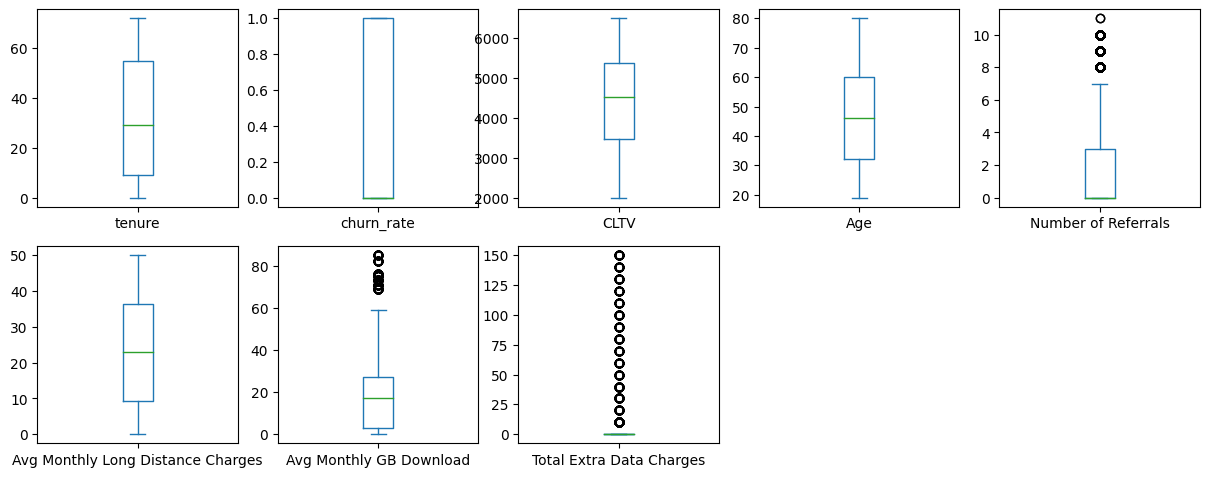

In [ ]:
df.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))

- Number of Referrals: 676개의 이상치
- Avg Monthly GB Download: 362개의 이상치
- Total Extra Data Charges: 728개의 이상치

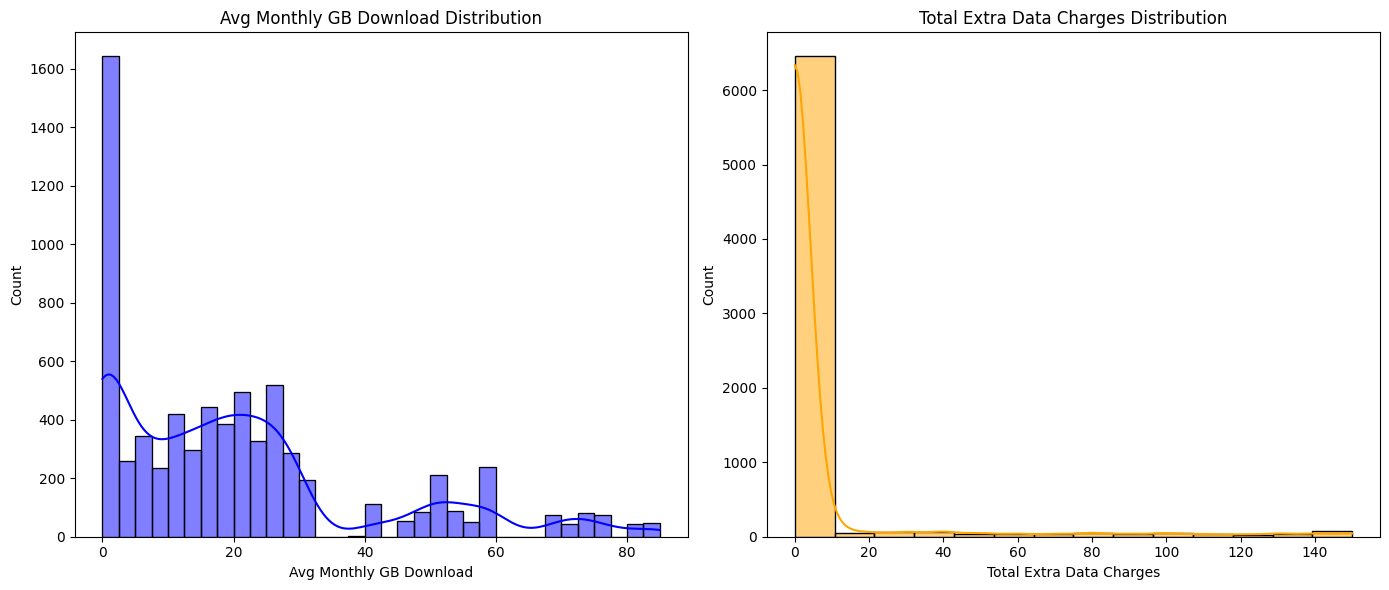

In [ ]:
# 두 컬럼에 대한 중심 경향 시각화 (히스토그램과 KDE)
plt.figure(figsize=(14, 6))

# Avg Monthly GB Download
plt.subplot(1, 2, 1)
sns.histplot(df['Avg Monthly GB Download'], kde=True, color='blue')
plt.title('Avg Monthly GB Download Distribution')
plt.xlabel('Avg Monthly GB Download')

# Total Extra Data Charges
plt.subplot(1, 2, 2)
sns.histplot(df['Total Extra Data Charges'], kde=True, color='orange')
plt.title('Total Extra Data Charges Distribution')
plt.xlabel('Total Extra Data Charges')

plt.tight_layout()
plt.show()

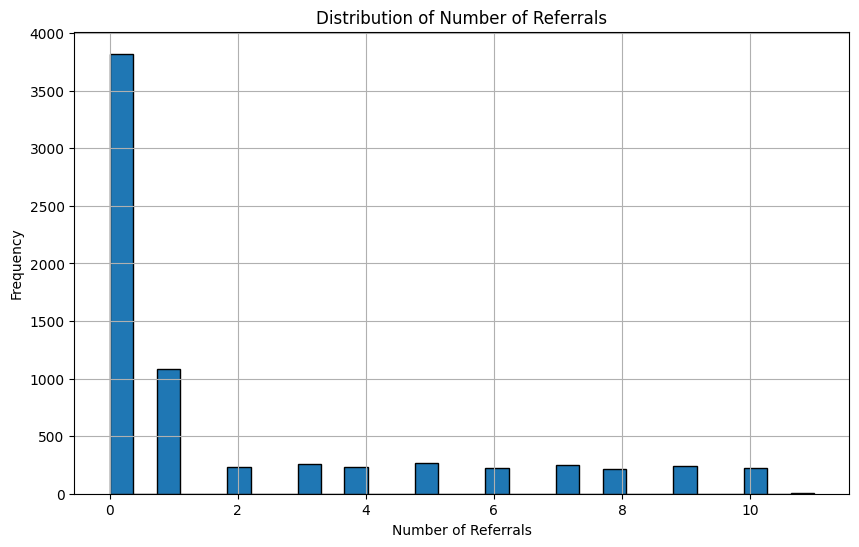

In [ ]:
# Number of Referrals 컬럼의 분포 그래프 그리기
plt.figure(figsize=(10, 6))
plt.hist(df['Number of Referrals'], bins=30, edgecolor='black')
plt.title('Distribution of Number of Referrals')
plt.xlabel('Number of Referrals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2-1. Avg Monthly GB Download - 클립핑(Clipping):
상하한선을 설정하고, 그 범위를 벗어나는 값을 상한선이나 하한선으로 조정하는 것이 자연스럽고 데이터의 분포를 왜곡하지 않는 방법
- 만약 이상치가 매우 극단적이지 않고, 데이터의 분포를 가능한 한 보존하고 싶다면 클리핑을 선택할 수 있습니다.
- 이 방법은 데이터의 원래 분포를 유지하려는 경우에 적합

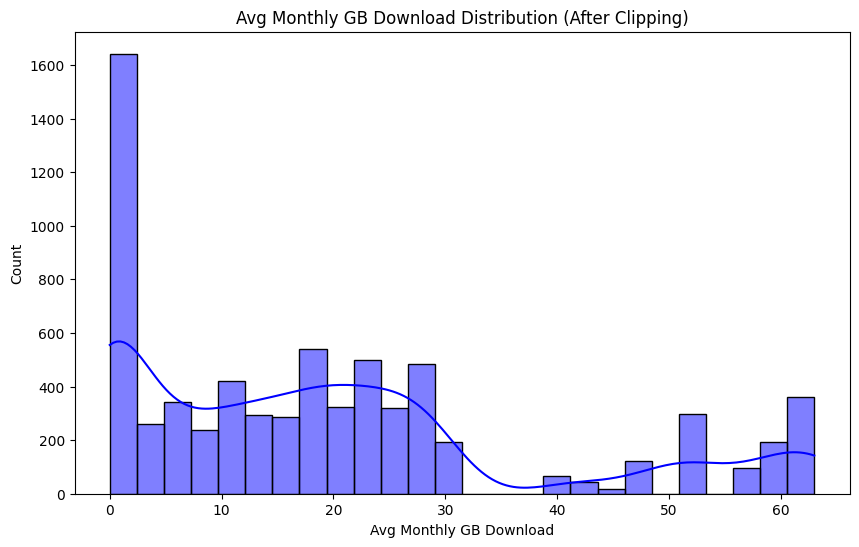

In [ ]:
# Avg Monthly GB Download 컬럼의 이상치를 클립핑으로 대체
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 클립핑 적용
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Avg Monthly GB Download 컬럼에 클립핑 적용
clip_outliers(df, 'Avg Monthly GB Download')

# 클립핑 후 데이터 분포 시각화
plt.figure(figsize=(10, 6))

sns.histplot(df['Avg Monthly GB Download'], kde=True, color='blue')
plt.title('Avg Monthly GB Download Distribution (After Clipping)')
plt.xlabel('Avg Monthly GB Download')

plt.show()

# 2-2. Total Extra Data Charges - 중간값
데이터의 대부분이 0
특히, 데이터의 50% 이상이 0을 차지하고 있어, 중간값으로 대체해도 데이터 분포에 큰 영향X
# 2-3. Number of Referrals - 중간값
- 컬럼의 이상치가 극단적이거나, 데이터의 분포가 비대칭적일 경우 중앙값 대체를 추천합니다.
- 중앙값 대체는 데이터의 중심 경향을 잘 보존하면서 극단적인 값의 영향을 제거할 수 있습니다.



In [ ]:
# 이상치를 중앙값으로 대체하는 함수
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    df[column] = df[column].apply(
        lambda x: median_value if x > upper_bound or x < lower_bound else x
    )

# Total Extra Data Charges 컬럼에 적용
replace_outliers_with_median(df, 'Total Extra Data Charges')

# Number of Referrals 컬럼에 적용
replace_outliers_with_median(df, 'Number of Referrals')

In [ ]:
df['Total Extra Data Charges'].describe()

count    7043.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Total Extra Data Charges, dtype: float64

In [ ]:
df['Number of Referrals'].describe()

count    7043.000000
mean        1.086043
std         1.939948
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: Number of Referrals, dtype: float64

In [ ]:
df.to_csv('Telco_outlier.csv', index=False)

# 3.인코딩 - 원핫
값이 3~4개 이므로 원핫인코딩

In [ ]:
df= pd.read_csv('Telco_outlier.csv')
df

,gender,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,churn_rate,CLTV,Age,Married,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Unlimited Data,Total Extra Data Charges
0,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,3239,37,No,0.0,10.47,21,No,Yes,0.0
1,Female,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,2701,19,No,0.0,9.12,51,No,Yes,0.0
2,Female,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1,5372,31,No,0.0,12.15,26,Yes,Yes,0.0
3,Female,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1,5003,23,Yes,0.0,4.89,47,Yes,Yes,0.0
4,Male,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1,5340,38,No,0.0,44.33,11,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0,5306,30,No,0.0,22.77,0,No,No,0.0
7039,Male,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0,2140,38,Yes,1.0,36.05,24,Yes,Yes,0.0
7040,Female,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0,5560,30,Yes,4.0,29.66,59,Yes,Yes,0.0
7041,Female,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0,2793,32,Yes,1.0,0.00,17,No,Yes,0.0


In [ ]:
# yes는 1, no의 경우 0
yes_no_col=['Dependents','PhoneService','PaperlessBilling','Married','Streaming Music','Unlimited Data']

for column in yes_no_col:
    df[column]=df[column].apply(lambda x : 1 if x == 'Yes' else 0)

# male 은 1, female 0
df['gender']=df['gender'].apply(lambda x: 1 if x =='Male' else 0)

In [ ]:
# 범주형 변수를 원핫 인코딩
df_encoded = pd.get_dummies(df, columns=[ 'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaymentMethod'])

In [ ]:
df_encoded

,gender,Dependents,tenure,PhoneService,PaperlessBilling,churn_rate,CLTV,Age,Married,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Streaming Music,Unlimited Data,Total Extra Data Charges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,2,1,1,1,3239,37,0,0.0,10.47,21,0,1,0.0,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
1,0,0,2,1,1,1,2701,19,0,0.0,9.12,51,0,1,0.0,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
2,0,0,8,1,1,1,5372,31,0,0.0,12.15,26,1,1,0.0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False
3,0,0,28,1,1,1,5003,23,1,0.0,4.89,47,1,1,0.0,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,False
4,1,0,49,1,1,1,5340,38,0,0.0,44.33,11,1,1,0.0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,1,1,0,5306,30,0,0.0,22.77,0,0,0,0.0,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False,False,False
7039,1,1,24,1,1,0,2140,38,1,1.0,36.05,24,1,1,0.0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
7040,0,1,72,1,1,0,5560,30,1,4.0,29.66,59,1,1,0.0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
7041,0,1,11,0,1,0,2793,32,1,1.0,0.00,17,0,1,0.0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


#4.train / test 나누기

In [ ]:

# 독립 변수 (features)와 종속 변수 (target) 분리
X = df_encoded.drop('churn_rate', axis=1)
y = df_encoded['churn_rate']

# train과 test셋을 80:20 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 45), (1409, 45), (5634,), (1409,))

# 5.데이터 불균형 - SMOTE

In [ ]:
# SMOTE 적용
smote = SMOTE(random_state=42)   # SMOTE 객체 생성
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 결과 확인
print(y_train_smote.value_counts(normalize=True))

churn_rate
0    0.5
1    0.5
Name: proportion, dtype: float64


# 6.스케일러 - Robust
- 데이터 분포가 정규분포에 가깝다면 StandardScaler가 적합합니다.
- 데이터가 특정 범위에 있어야 하거나 정규분포를 따르지 않는다면 MinMaxScaler가 적합합니다.
- 이상치가 많다면 RobustScaler를 사용하는 것이 좋습니다.
- 특정 컬럼의 특성을 기준으로 (예: 피처 간의 비교를 위해 특정 범위로 제한해야 할 때) MaxAbsScaler 등을 사용할 수 있습니다.

In [ ]:
# RobustScaler 적용
scaler = RobustScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 결과 확인 (옵션)
print("X_train_smote_scaled shape:", X_train_smote_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_smote_scaled shape: (8330, 45)
X_test_scaled shape: (1409, 45)


In [ ]:
# 스케일링된 데이터프레임을 다시 pandas 데이터프레임으로 변환
X_train_smote_scaled_df = pd.DataFrame(X_train_smote_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y_train_smote와 y_test를 추가하여 완전한 데이터셋 생성
train_final_df = X_train_smote_scaled_df.copy()
train_final_df['churn_rate'] = y_train_smote.values

test_final_df = X_test_scaled_df.copy()
test_final_df['churn_rate'] = y_test.values

# Train 데이터 저장
train_final_df.to_csv('Telco_train_final1.csv', index=False)

# Test 데이터 저장
test_final_df.to_csv('Telco_test_final1.csv', index=False)


# 7.모델학습

In [ ]:
# Train과 Test 데이터 로드
train_file_path = 'Telco_train_final1.csv'
test_file_path = 'Telco_test_final1.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# X_train, y_train, X_test, y_test 분리
X_train = train_df.drop('churn_rate', axis=1)
y_train = train_df['churn_rate']

X_test = test_df.drop('churn_rate', axis=1)
y_test = test_df['churn_rate']

# 모델 리스트
models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# 성능 비교를 위한 빈 리스트 생성
performance_list = []

# 각 모델에 대해 훈련 및 테스트 수행
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 성능 측정
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    performance_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# 리스트를 데이터프레임으로 변환
performance_df = pd.DataFrame(performance_list)

# 성능 비교 결과 출력
performance_df = performance_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(performance_df)

                        Model  Accuracy  Precision  Recall  F1 Score
0          AdaBoostClassifier  0.805536   0.645161  0.7000  0.671463
1  GradientBoostingClassifier  0.816182   0.685039  0.6525  0.668374
2          LogisticRegression  0.794180   0.652778  0.5875  0.618421
3      RandomForestClassifier  0.800568   0.677612  0.5675  0.617687
4         K-Nearest Neighbors  0.758694   0.569444  0.6150  0.591346
5      DecisionTreeClassifier  0.737402   0.535714  0.5625  0.548780


# 8.교차검증

In [ ]:
# 교차검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 비교를 위한 빈 리스트 생성
cv_performance_list = []

# 각 모델에 대해 교차검증 수행
for model_name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
    cv_performance_list.append({
        'Model': model_name,
        'Mean F1 Score': cv_scores.mean(),
        'Std F1 Score': cv_scores.std()
    })

# 리스트를 데이터프레임으로 변환
cv_performance_df = pd.DataFrame(cv_performance_list)

# 성능 비교 결과 출력
cv_performance_df = cv_performance_df.sort_values(by='Mean F1 Score', ascending=False).reset_index(drop=True)
print(cv_performance_df)

                        Model  Mean F1 Score  Std F1 Score
0  GradientBoostingClassifier       0.874628      0.003345
1      RandomForestClassifier       0.870754      0.004236
2          AdaBoostClassifier       0.868906      0.005012
3          LogisticRegression       0.863775      0.006207
4         K-Nearest Neighbors       0.850015      0.003889
5      DecisionTreeClassifier       0.818917      0.009048


In [ ]:
# pandas 옵션을 설정하여 모든 열이 출력되도록 설정
pd.set_option('display.max_columns', None)

# 교차검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 비교를 위한 빈 리스트 생성
cv_performance_list = []

# 각 모델에 대해 교차검증 수행
for model_name, model in models:
    precision_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')

    cv_performance_list.append({
        'Model': model_name,
        'Mean Precision': precision_scores.mean(),
        'Std Precision': precision_scores.std(),
        'Mean Recall': recall_scores.mean(),
        'Std Recall': recall_scores.std(),
        'Mean F1 Score': f1_scores.mean(),
        'Std F1 Score': f1_scores.std(),
    })

# 리스트를 데이터프레임으로 변환
cv_performance_df = pd.DataFrame(cv_performance_list)

# 성능 비교 결과 출력
cv_performance_df = cv_performance_df.sort_values(by='Mean F1 Score', ascending=False).reset_index(drop=True)
print(cv_performance_df)

                        Model  Mean Precision  Std Precision  Mean Recall  \
0  GradientBoostingClassifier        0.879906       0.007808     0.869478   
1      RandomForestClassifier        0.884770       0.008658     0.857260   
2          AdaBoostClassifier        0.861436       0.005785     0.876625   
3          LogisticRegression        0.886310       0.007228     0.842459   
4         K-Nearest Neighbors        0.833285       0.003316     0.867458   
5      DecisionTreeClassifier        0.817039       0.012409     0.820855   

   Std Recall  Mean F1 Score  Std F1 Score  
0    0.004447       0.874628      0.003345  
1    0.006241       0.870754      0.004236  
2    0.011040       0.868906      0.005012  
3    0.010641       0.863775      0.006207  
4    0.006608       0.850015      0.003889  
5    0.007182       0.818917      0.009048  


# 평가 지표 설명:
1. Mean F1 Score:
- 모델의 정밀도와 재현율의 조화를 측정하는 지표
- 모델의 전반적인 성능을 평가하는 데 유용

2. Std F1 Score:
- F1 스코어의 표준편차를 나타냄
- 모델의 성능이 얼마나 일관된지를.
- 표준편차가 낮을수록 성능의 변동성이 적고, 보다 신뢰할 수 있는 모델

# ==> GradientBoostingClassifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train과 Test 데이터 로드
train_file_path = 'Telco_train_final1.csv'
test_file_path = 'Telco_test_final1.csv'

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

# X_train, y_train, X_test, y_test 분리
X_train = train_df.drop('churn_rate', axis=1)
y_train = train_df['churn_rate']

X_test = test_df.drop('churn_rate', axis=1)
y_test = test_df['churn_rate']

# 모델 리스트
models = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# 성능 비교를 위한 빈 리스트
performance_list = []

# 예측 결과를 저장하기 위한 DataFrame 생성
outcome_df = pd.DataFrame({'Actual': y_test})

# 각 모델에 대해 훈련 및 테스트 수행
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 성능 측정
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    performance_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    # 예측 결과를 DataFrame에 추가
    outcome_df[model_name] = y_pred

# 리스트를 데이터프레임으로 변환
performance_df = pd.DataFrame(performance_list)

# 성능 비교 결과 출력
performance_df = performance_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print(performance_df)


outcome_df.to_csv('outcome.csv', index=False)


                        Model  Accuracy  Precision  Recall  F1 Score
0          AdaBoostClassifier  0.805536   0.645161  0.7000  0.671463
1  GradientBoostingClassifier  0.816182   0.685039  0.6525  0.668374
2          LogisticRegression  0.794180   0.652778  0.5875  0.618421
3      RandomForestClassifier  0.800568   0.677612  0.5675  0.617687
4         K-Nearest Neighbors  0.758694   0.569444  0.6150  0.591346
5      DecisionTreeClassifier  0.737402   0.535714  0.5625  0.548780
